##Hi again
In this colab notebook, I am going to be performing Exploraoty Data Analytics (EDA) to better help my clients (Toyota) make better decisions, which fosters transportation and better living at large



Firstly, loading the dataset, using pandas.

In [177]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/toyota_file.zip")

df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


Now, for the shape of the dataset (the numbers of rows and columns)

In [178]:
df.shape

(1436, 10)

There are 1436 rows and 10 columns (interesting)

Now, for missing values

In [179]:
df.isnull().sum().sum()

np.int64(0)

Great, no missing values.

In [180]:
df.duplicated().sum()

np.int64(1)

Now, for duplicates, there's one entry

We remove it.

In [181]:
clean_df = df.drop_duplicates()

Now that the data is cleaned, we can find out the mathematical summary and all other information that would foster our analysis

In [182]:
clean_df.to_csv('clean_toyota.csv', index=False)


In [183]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1435 non-null   int64 
 1   Age        1435 non-null   int64 
 2   KM         1435 non-null   int64 
 3   FuelType   1435 non-null   object
 4   HP         1435 non-null   int64 
 5   MetColor   1435 non-null   int64 
 6   Automatic  1435 non-null   int64 
 7   CC         1435 non-null   int64 
 8   Doors      1435 non-null   int64 
 9   Weight     1435 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 123.3+ KB


In [184]:
clean_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1435.0,10720.915679,3608.732978,4350.0,8450.0,9900.0,11950.0,32500.0
Age,1435.0,55.980488,18.563312,1.0,44.0,61.0,70.0,80.0
KM,1435.0,68571.782578,37491.094553,1.0,43000.0,63451.0,87041.5,243000.0
HP,1435.0,101.491986,14.981408,69.0,90.0,110.0,110.0,192.0
MetColor,1435.0,0.674564,0.468701,0.0,0.0,1.0,1.0,1.0
Automatic,1435.0,0.055749,0.229517,0.0,0.0,0.0,0.0,1.0
CC,1435.0,1566.526132,186.897718,1300.0,1400.0,1600.0,1600.0,2000.0
Doors,1435.0,4.032753,0.952667,2.0,3.0,4.0,5.0,5.0
Weight,1435.0,1072.287108,52.251882,1000.0,1040.0,1070.0,1085.0,1615.0


Now, I'm going to encode categorical variables (just one column)

In [185]:
import pandas as pd

clean_df = pd.get_dummies(clean_df, columns=["FuelType"], drop_first=True, dtype = "int")
print(clean_df.head())

   Price  Age     KM  HP  MetColor  Automatic    CC  Doors  Weight  \
0  13500   23  46986  90         1          0  2000      3    1165   
1  13750   23  72937  90         1          0  2000      3    1165   
2  13950   24  41711  90         1          0  2000      3    1165   
3  14950   26  48000  90         0          0  2000      3    1165   
4  13750   30  38500  90         0          0  2000      3    1170   

   FuelType_Diesel  FuelType_Petrol  
0                1                0  
1                1                0  
2                1                0  
3                1                0  
4                1                0  


After perfoming one-hot encoding for the fuel column, we want to be sure that all the columns are in the right data types

In [186]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Price            1435 non-null   int64
 1   Age              1435 non-null   int64
 2   KM               1435 non-null   int64
 3   HP               1435 non-null   int64
 4   MetColor         1435 non-null   int64
 5   Automatic        1435 non-null   int64
 6   CC               1435 non-null   int64
 7   Doors            1435 non-null   int64
 8   Weight           1435 non-null   int64
 9   FuelType_Diesel  1435 non-null   int64
 10  FuelType_Petrol  1435 non-null   int64
dtypes: int64(11)
memory usage: 134.5 KB


We are performing EDA with Visualization and the first question is:

What is the overall distribution of car prices?

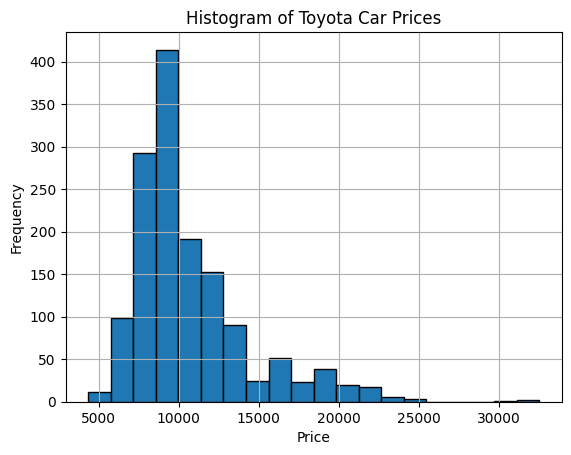

In [187]:
import matplotlib.pyplot as plt

plt.hist(clean_df['Price'], bins=20, edgecolor='black')
plt.title('Histogram of Toyota Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In this chart, we notice some skewness(outliers) because there are some cars that are in the price range of $30000+ dollars,

way above come cars that are in the range of $5000+

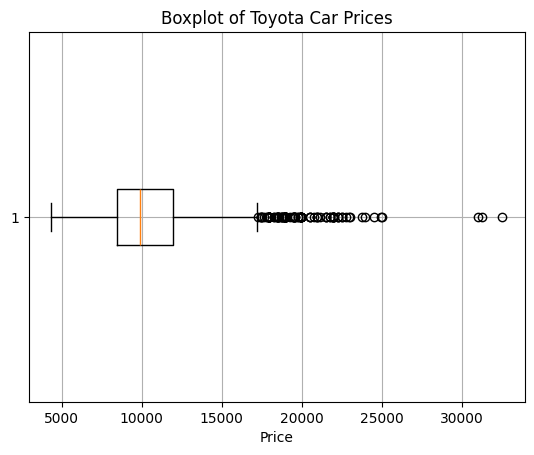

In [188]:
plt.boxplot(clean_df['Price'], vert=False)
plt.title('Boxplot of Toyota Car Prices')
plt.xlabel('Price')
plt.grid(True)
plt.show()


It won't hurt to have better understanding using a boxplot. From this, we see that most of the prices are above the IQR (Inter Quartile Range)

Question 2 says:

How does the age of a car relate to its price.

We use a scatterplot to answer our question.

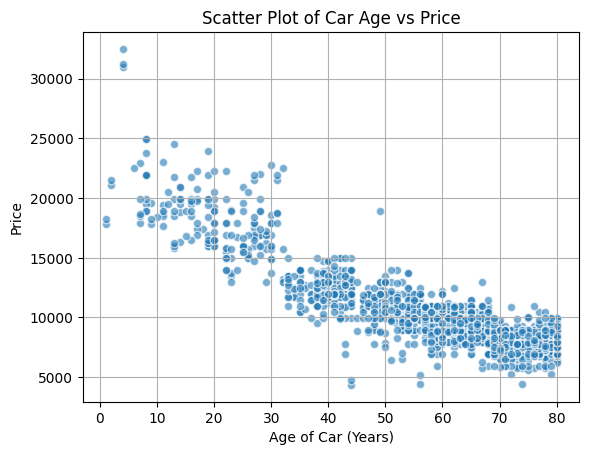

In [189]:
# Create scatter plot for Age vs Price
plt.scatter(clean_df['Age'], clean_df['Price'], alpha=0.6, edgecolors='w')
plt.title('Scatter Plot of Car Age vs Price')
plt.xlabel('Age of Car (Years)')
plt.ylabel('Price')
plt.grid(True)
plt.show()


From this plot, we can simply say, "the older the car, the lesser the price of the car becomes"

Third question:

Do cars with higher kilometers driven tend to be cheaper?

Another scatterplot to answer this question

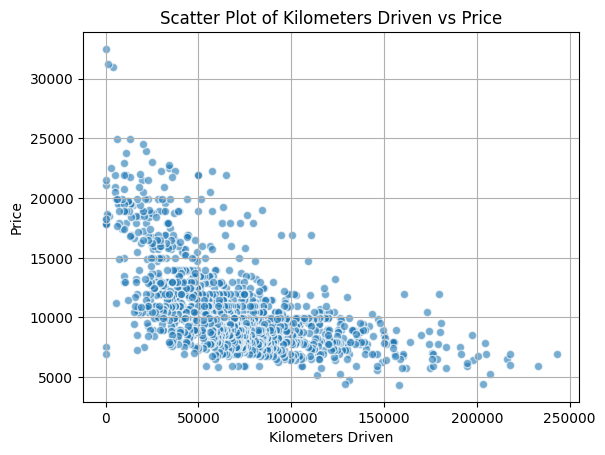

In [190]:
# Create scatter plot for Kilometers vs Price
plt.scatter(clean_df['KM'], clean_df['Price'], alpha=0.6, edgecolors='w')
plt.title('Scatter Plot of Kilometers Driven vs Price')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.grid(True)
plt.show()


Studying this chart, it is visible that there is a direct proportion between the kilometer driven and the price of the car (in most cases)

Question 4
Compare the price distribution across different fuel types

While tryinf to plot for this question, I realized I do not need the encoded version of the "FuelType" column, I moved on using "df" and not "clean_df"

/tmp/ipython-input-3409291052.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([diesel_prices, petrol_prices, cng_prices],


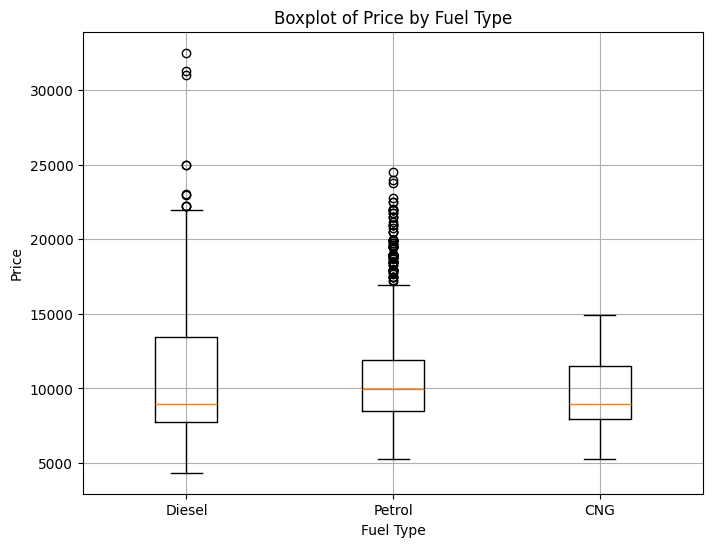

In [191]:
import matplotlib.pyplot as plt

# Separate prices by fuel type using one-hot encoded columns
diesel_prices = clean_df['Price'][clean_df['FuelType_Diesel'] == 1]
petrol_prices = clean_df['Price'][clean_df['FuelType_Petrol'] == 1]
cng_prices = clean_df['Price'][(clean_df['FuelType_Diesel'] == 0) & (clean_df['FuelType_Petrol'] == 0)]

# Create boxplot to compare price distribution across fuel types
plt.figure(figsize=(8, 6))
plt.boxplot([diesel_prices, petrol_prices, cng_prices],
            labels=['Diesel', 'Petrol', 'CNG'])
plt.title('Boxplot of Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.grid(True)
plt.show()

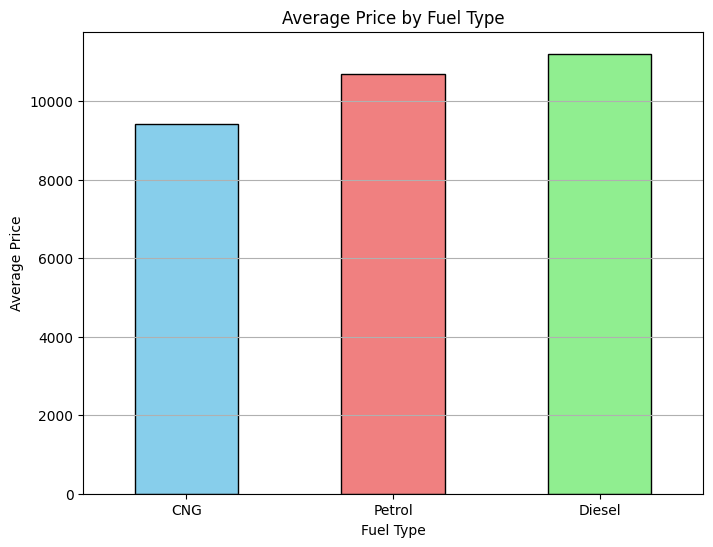

In [192]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate average price for each fuel type using one-hot encoded columns in clean_df
# Group by the one-hot encoded columns
avg_prices = clean_df.groupby(['FuelType_Diesel', 'FuelType_Petrol'])['Price'].mean()

# Map multi-index to fuel type names
fuel_type_labels = {
    (0, 0): 'CNG',
    (1, 0): 'Diesel',
    (0, 1): 'Petrol'
}
avg_prices.index = [fuel_type_labels[idx] for idx in avg_prices.index]

# Create bar chart
plt.figure(figsize=(8, 6))
avg_prices.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'], edgecolor='black')
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


Summary: The most expensive fuel type is Diesel and the least expesive (cheapest) is CNG - Compressed Natural Gas

Question 5.
 Is there any relationship between engine horsepower and car price?

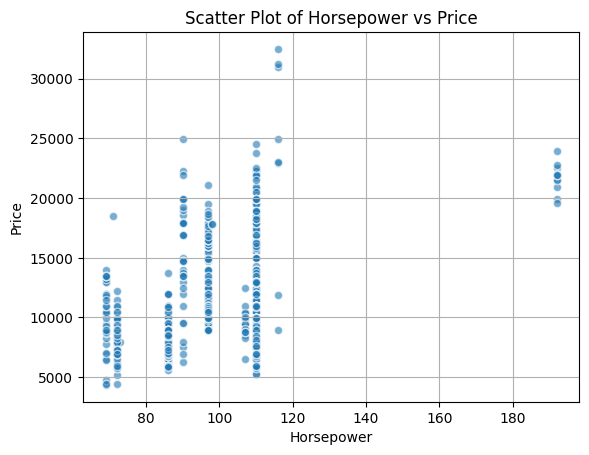

In [193]:
# Create scatter plot for Horsepower vs Price
plt.scatter(clean_df['HP'], clean_df['Price'], alpha=0.6, edgecolors='w')
plt.title('Scatter Plot of Horsepower vs Price')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.grid(True)
plt.show()


From the above code, there is no clear (direct or inverse) relationship between the horse power and the car price

Question 6.
How are automatic and manual cars distributed in the dataset.

A bar chart answers this question

**1** represents AUTOMATIC while **0** represents MANUAL

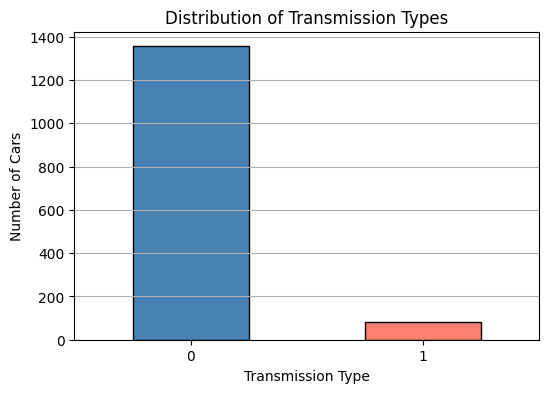

In [194]:
# Count the number of cars by transmission type
transmission_counts = clean_df['Automatic'].value_counts()

# Create bar chart
plt.figure(figsize=(6, 4))
transmission_counts.plot(kind='bar', color=['steelblue', 'salmon'], edgecolor='black')
plt.title('Distribution of Transmission Types')
plt.xlabel('Transmission Type')
plt.ylabel('Number of Cars')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


There are more manual cars that automatic cars.

Question 7. What variables appears to be most strongly correlated with price?

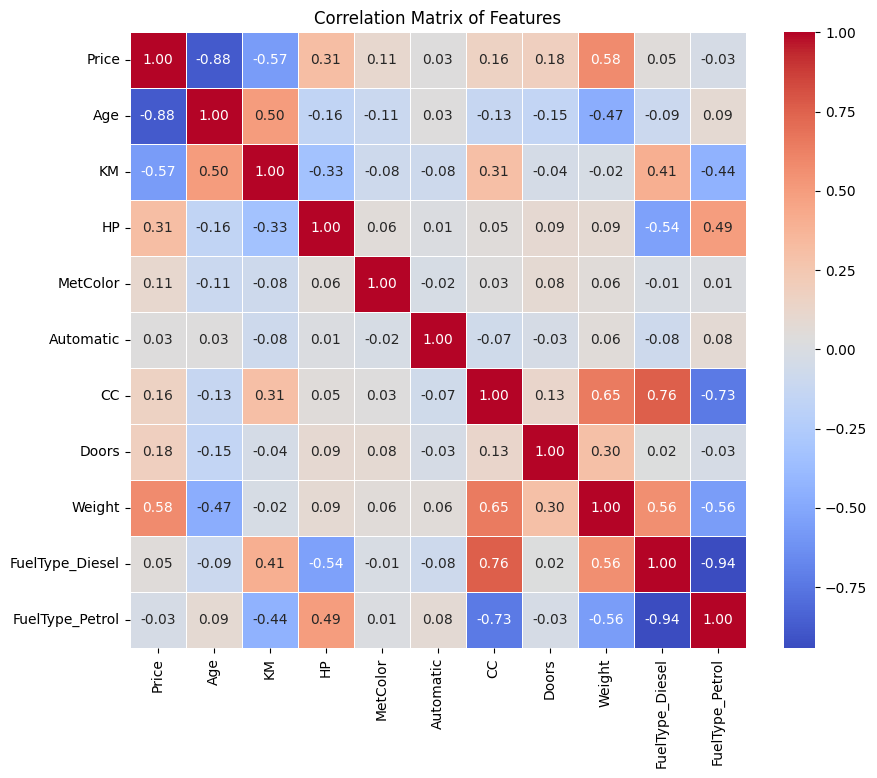

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = clean_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()


Negatively, Age is strongly correlated (-0.88)to price

Positively, weight is slightly correlated (0.58) to Price

Futher explaining the analysis between Car's age and Price that was done earlier

Question 8. Explore how the number of doors or the car's weight might influence the price

A boxplot is preferred

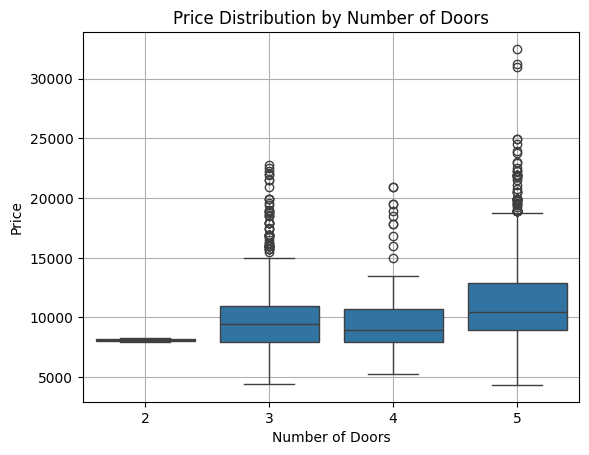

In [196]:
sns.boxplot(x='Doors', y='Price', data=clean_df)
plt.title('Price Distribution by Number of Doors')
plt.xlabel('Number of Doors')
plt.ylabel('Price')
plt.grid(True)
plt.show()


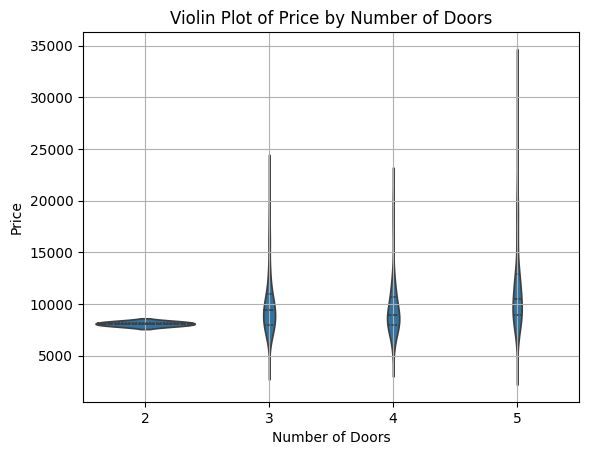

In [197]:
sns.violinplot(x='Doors', y='Price', data=clean_df, inner='quartile')
plt.title('Violin Plot of Price by Number of Doors')
plt.xlabel('Number of Doors')
plt.ylabel('Price')
plt.grid(True)
plt.show()


Cars with 5 doors are more expensive (maybe they scream luxury)

**Now for trends and patterns**

Question 9

Identify any non-linear relationships between variables and prices

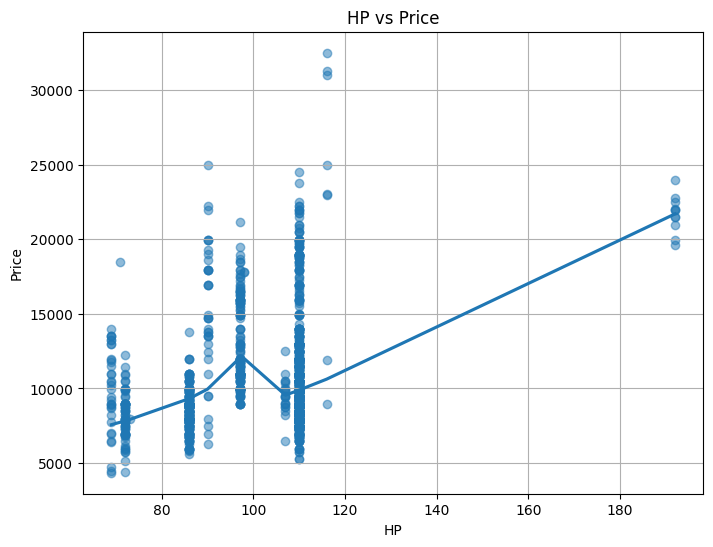

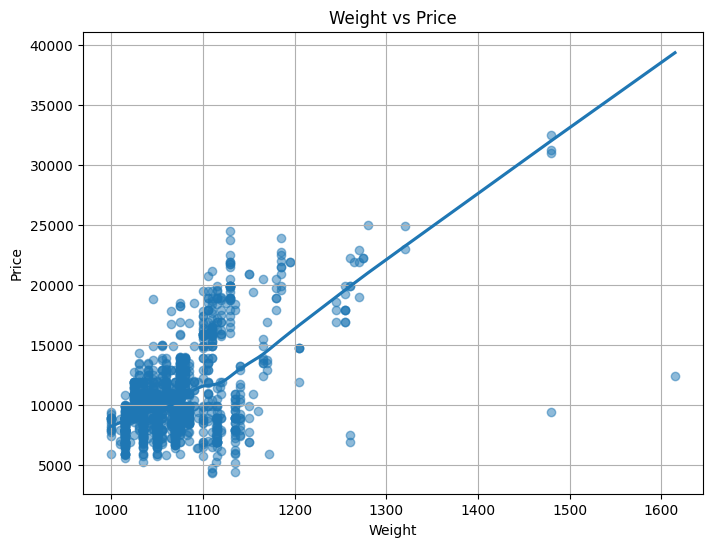

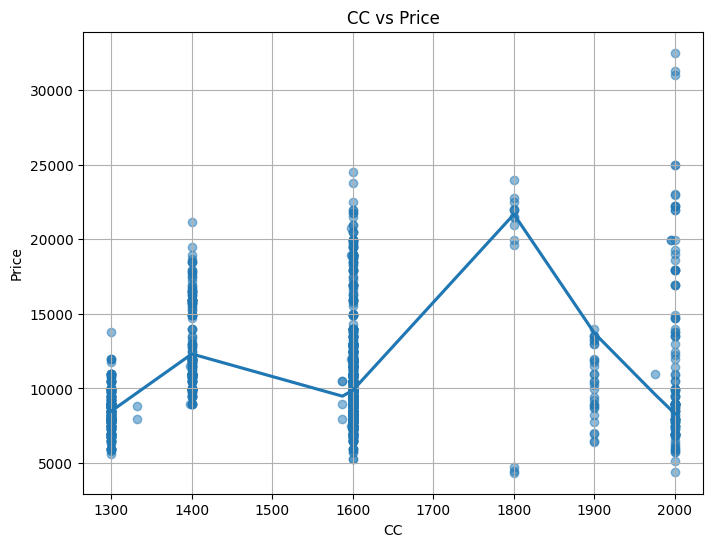

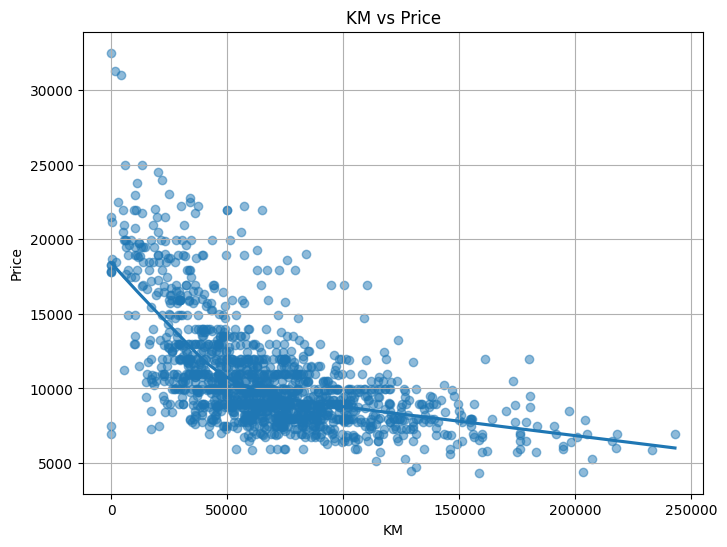

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numeric variables to test against Price
features = ['HP', 'Weight', 'CC', 'KM']

# Create regression plots with LOWESS smoothing
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=feature, y='Price', data=clean_df, lowess=True, scatter_kws={'alpha': 0.5})
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()


They (CC, Horse Power, KM and Weight) all have linear relationship with Price (even though some are retarding and not entirely progressing).

It's seeming like KM has a non-linear relationship (with a closer look)

Question 10.

Are heavier cars more expensive?

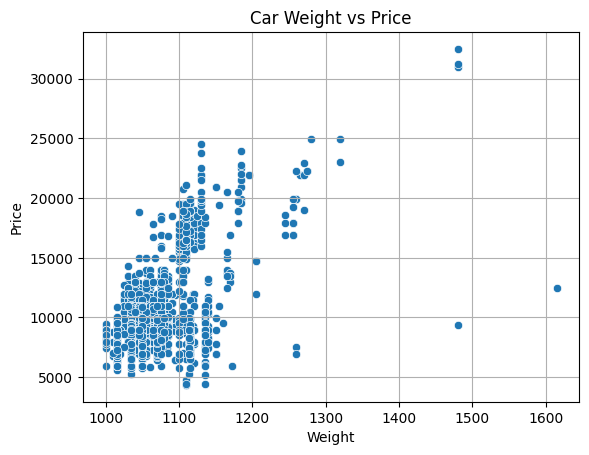

In [199]:
sns.scatterplot(x='Weight', y='Price', data=clean_df)
plt.title('Car Weight vs Price')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.grid(True)
plt.show()

11.

Do metallic colurs affect the price?

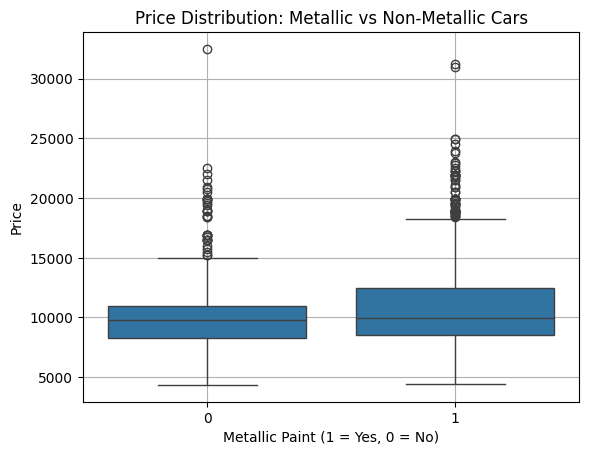

In [200]:
sns.boxplot(x='MetColor', y='Price', data=clean_df)
plt.title('Price Distribution: Metallic vs Non-Metallic Cars')
plt.xlabel('Metallic Paint (1 = Yes, 0 = No)')
plt.ylabel('Price')
plt.grid(True)
plt.show()


Question 12.

Are Cars with Higher Engine Capacity Always More Expensive?

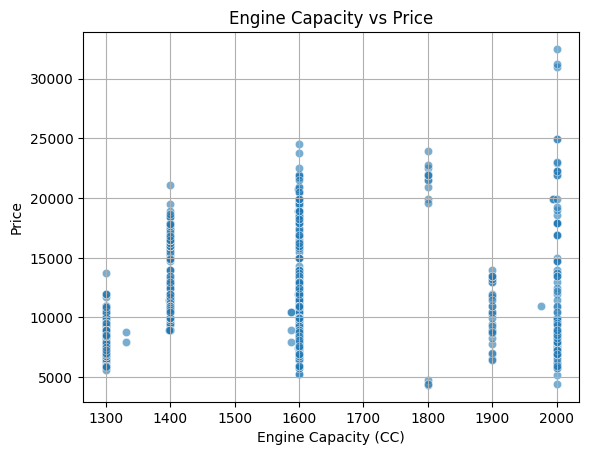

In [201]:
sns.scatterplot(x='CC', y='Price', data=clean_df, alpha=0.6)
plt.title('Engine Capacity vs Price')
plt.xlabel('Engine Capacity (CC)')
plt.ylabel('Price')
plt.grid(True)
plt.show()


According to the chart, the cars with the highest CC (Engine Capacity) are the most expensive (in a few cases)

Question 13.

Distribution of Horsepower Across Fuel Types

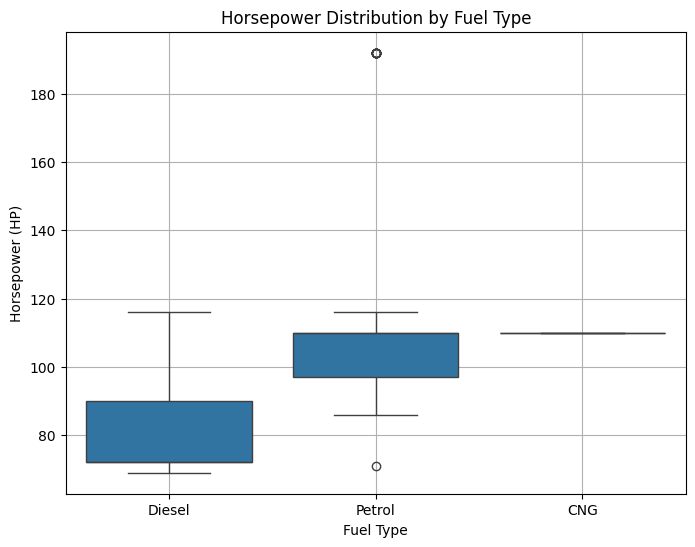

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a temporary 'FuelType' column in clean_df for plotting purposes
# Map the one-hot encoded columns back to original fuel type names
def get_fuel_type(row):
    if row['FuelType_Diesel'] == 1:
        return 'Diesel'
    elif row['FuelType_Petrol'] == 1:
        return 'Petrol'
    else:
        return 'CNG'

clean_df['FuelType'] = clean_df.apply(get_fuel_type, axis=1)

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='FuelType', y='HP', data=clean_df)
plt.title('Horsepower Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Horsepower (HP)')
plt.grid(True)
plt.show()

# Drop the temporary 'FuelType' column after plotting
clean_df = clean_df.drop('FuelType', axis=1)

Question 14. Compare Price, Age, and KM Together

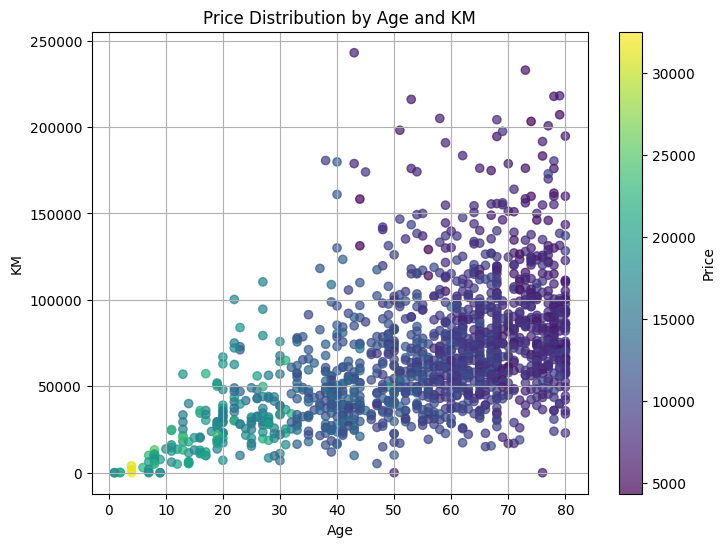

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

# Color-coded scatter plot: Age vs KM, colored by Price
plt.figure(figsize=(8, 6))
scatter = plt.scatter(clean_df['Age'], clean_df['KM'], c=clean_df['Price'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Price')
plt.title('Price Distribution by Age and KM')
plt.xlabel('Age')
plt.ylabel('KM')
plt.grid(True)
plt.show()


Question 15.

Explore interactions Among Age, KM, HP, and Price

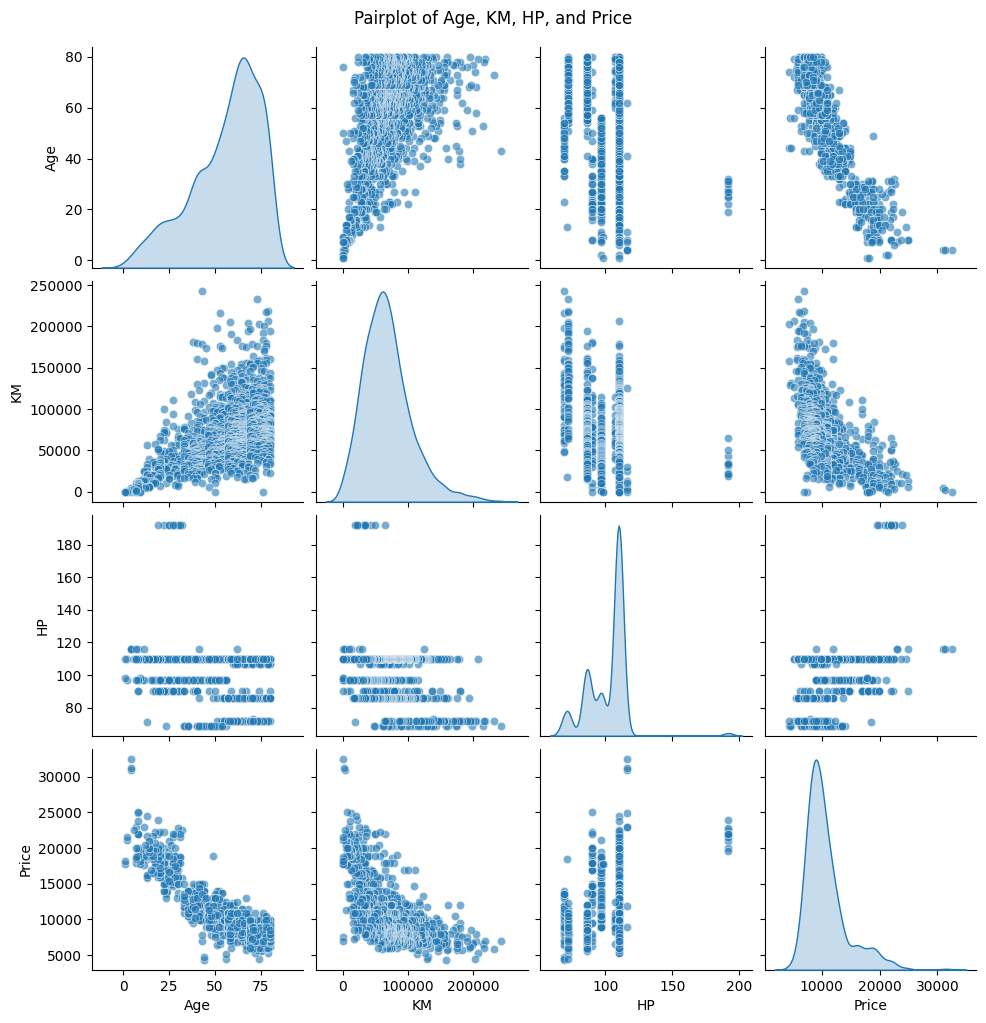

In [204]:
sns.pairplot(clean_df[['Age', 'KM', 'HP', 'Price']], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Age, KM, HP, and Price', y=1.02)
plt.show()


Question 16.

Heatmap of Correlations Between All Numeric Features


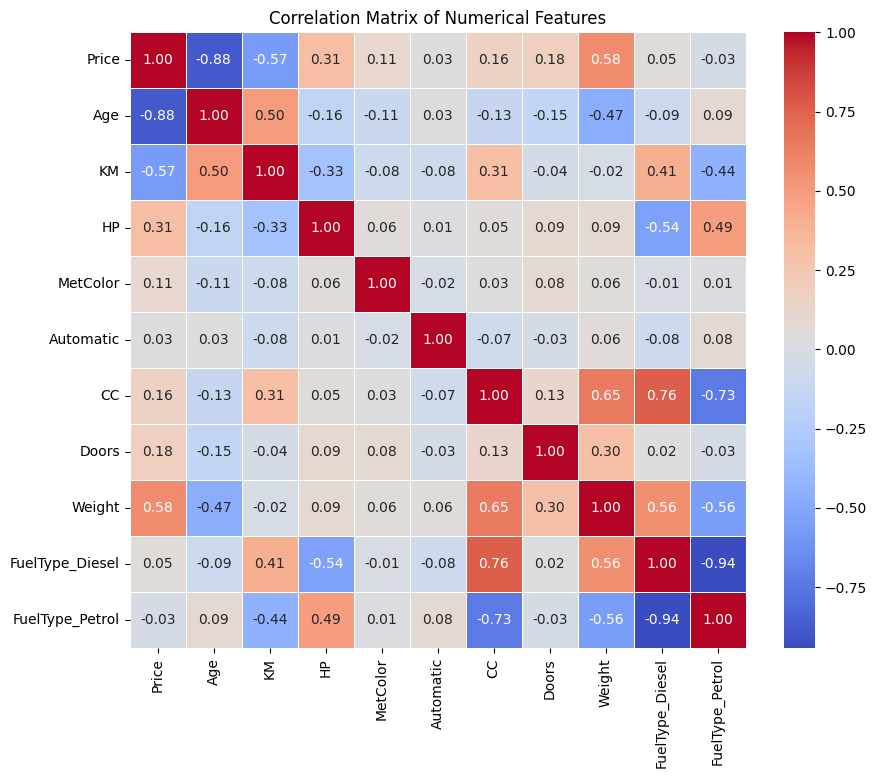

In [205]:
plt.figure(figsize=(10, 8))
sns.heatmap(clean_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

Question 17. create a dashboard-style figure summarizing at least 3 key findings from your EDA


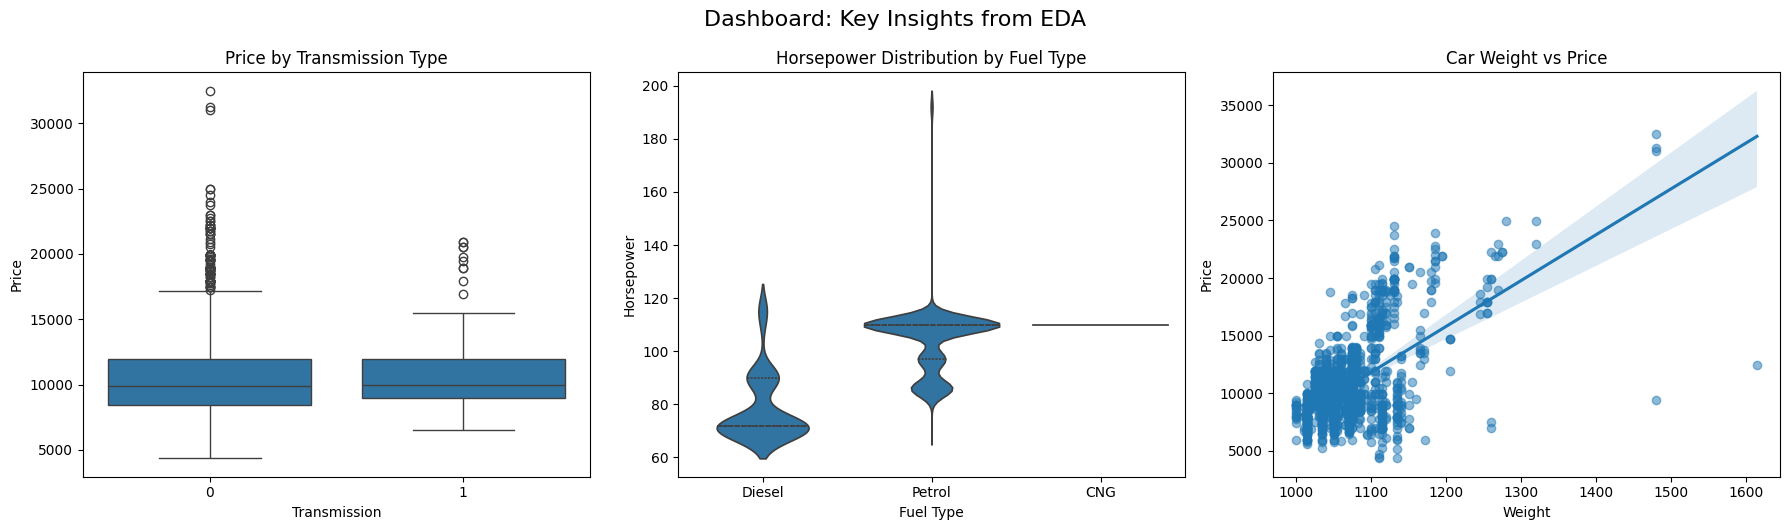

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Finding 1: Transmission Type vs Price
sns.boxplot(x='Automatic', y='Price', data=clean_df, ax=axes[0])
axes[0].set_title('Price by Transmission Type')
axes[0].set_xlabel('Transmission')
axes[0].set_ylabel('Price')

# Finding 2: Fuel Type vs Horsepower
sns.violinplot(x='FuelType', y='HP', data=df, ax=axes[1], inner='quartile')
axes[1].set_title('Horsepower Distribution by Fuel Type')
axes[1].set_xlabel('Fuel Type')
axes[1].set_ylabel('Horsepower')

# Finding 3: Weight vs Price
sns.regplot(x='Weight', y='Price', data=clean_df, ax=axes[2], scatter_kws={'alpha': 0.5})
axes[2].set_title('Car Weight vs Price')
axes[2].set_xlabel('Weight')
axes[2].set_ylabel('Price')

plt.tight_layout()
plt.suptitle('Dashboard: Key Insights from EDA', fontsize=16, y=1.05)
plt.show()


Question 18. From findings, suggest 5 features relevant for predicting car price, using visualizations

Using the heatmap above, the top 5 positive most correlative features are:

**1. Car Weight**

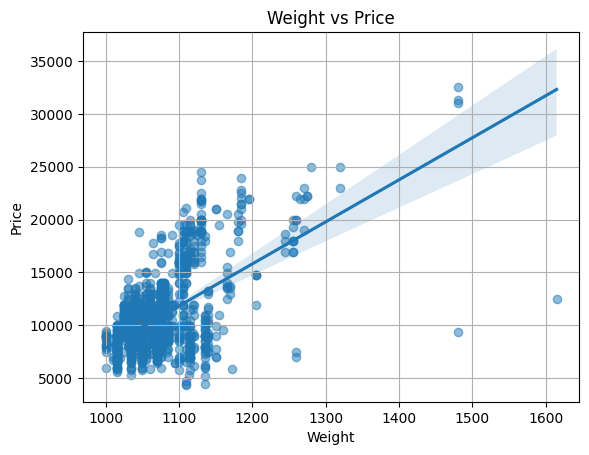

In [207]:
sns.regplot(x='Weight', y='Price', data=clean_df, scatter_kws={'alpha': 0.5})
plt.title('Weight vs Price')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.grid(True)
plt.show()


It progresses linearly, so it positively affects Car Price

**2. Horse Power**

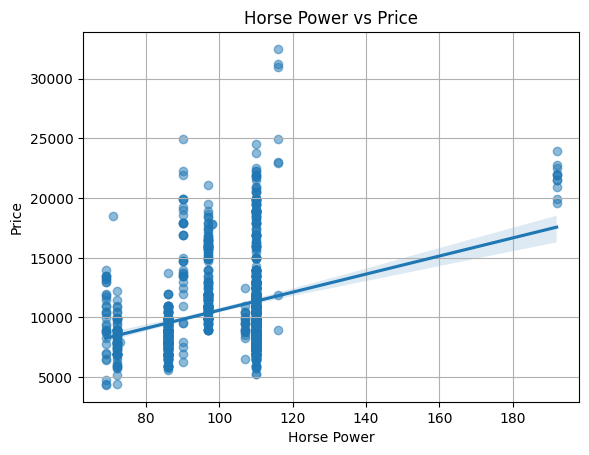

In [208]:
sns.regplot(x='HP', y='Price', data=clean_df, scatter_kws={'alpha': 0.5})
plt.title('Horse Power vs Price')
plt.xlabel('Horse Power')
plt.ylabel('Price')
plt.grid(True)
plt.show()


It produces a similar graph to the previous one, meaning it positively affects the Car Price

**3. Door**

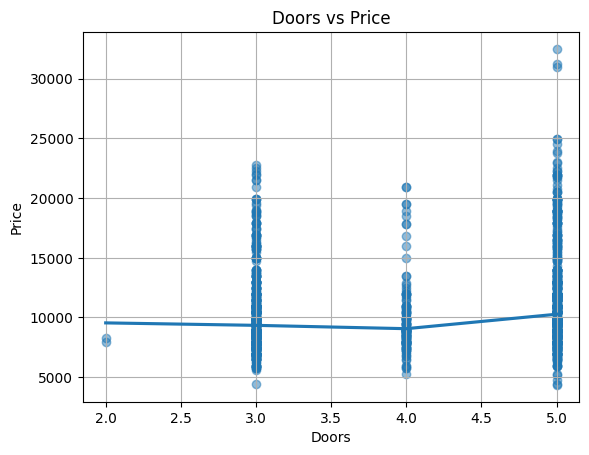

In [216]:
sns.regplot(x='Doors', y='Price', data=clean_df, lowess=True, scatter_kws={'alpha': 0.5})
plt.title('Doors vs Price')
plt.xlabel('Doors')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Here, it shows that "door" has a little positive impact to the price of a car.

**4. Engine Capacity (CC)**

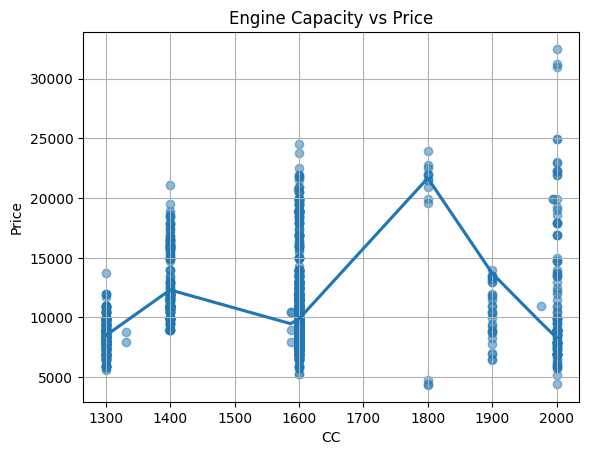

In [215]:
sns.regplot(x='CC', y='Price', data=clean_df, lowess=True, scatter_kws={'alpha': 0.5})
plt.title('Engine Capacity vs Price')
plt.xlabel('CC')
plt.ylabel('Price')
plt.grid(True)
plt.show()


It rises and falls - It has both a peak and a trough, but the peak is higher, meaning it positively affects the Car Price

In [ ]:
sns.boxplot(x='Automatic', y='Price', data=clean_df)
plt.title('Price by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.grid(True)
plt.show()


**5. Transmission Type**

**0 for manual cars. 1 for automatic cars**

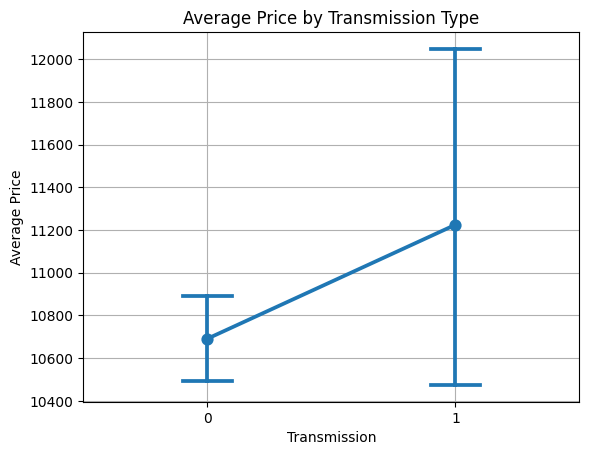

In [211]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pointplot shows mean price with confidence intervals
sns.pointplot(x='Automatic', y='Price', data=clean_df, capsize=0.2)
plt.title('Average Price by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


**Extra. Age of Car**

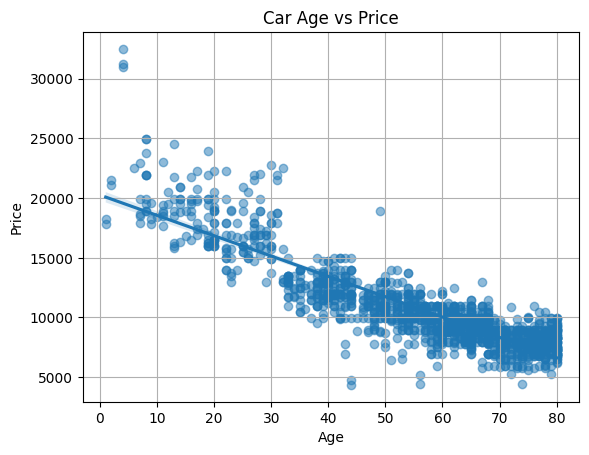

In [212]:
sns.regplot(x='Age', y='Price', data=clean_df, scatter_kws={'alpha': 0.5})
plt.title('Car Age vs Price')
plt.xlabel('Age')
plt.ylabel('Price')
plt.grid(True)
plt.show()


It's a regressive line graph, meaning it affects the car price negatively

Now, I want to use MI (Mutual Information) score to validate the top 5 features that strongly correlate with the Car Price

In [213]:
from sklearn.feature_selection import mutual_info_regression

# Select numeric and encoded categorical features
features = ['HP', 'Weight', 'CC', 'Age', 'Automatic', 'FuelType', "MetColor"]
X = df[features]
y = df['Price']

# Encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Compute MI scores
mi_scores = mutual_info_regression(X_encoded, y)
mi_series = pd.Series(mi_scores, index=X_encoded.columns).sort_values(ascending=False)

# Display top features
print("Top features by MI score:")
print(mi_series.head(10))


Top features by MI score:
Age                0.826318
Weight             0.503524
HP                 0.208894
CC                 0.193612
FuelType_Petrol    0.041966
FuelType_Diesel    0.025651
Automatic          0.017908
MetColor           0.015064
dtype: float64


In [217]:
pip freeze > requirements.txt


*whew!!!*

That was alot, and that is all for now.

# I remain, Atinuke Towoju

Go check out my github @github.com/Atinukecodes for more info.